In [2]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [3]:
csv_save_directory = "/usr/data/datasets/kalman-data/personal_folder/cva/graduate-work/data/processed/2d/"

In [4]:
data_pd = pd.read_csv(f"{csv_save_directory}/all_data.csv", index_col=0)

<AxesSubplot:>

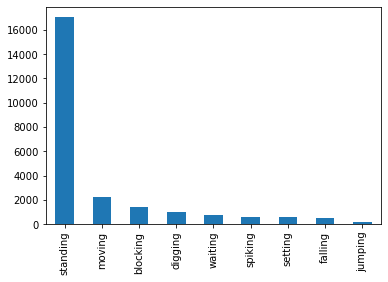

In [5]:
data_pd.motion.value_counts().plot(kind="bar")

In [6]:
data_pd = data_pd.drop(data_pd[data_pd['motion'] == "standing"].sample(n=15000).index)


<AxesSubplot:>

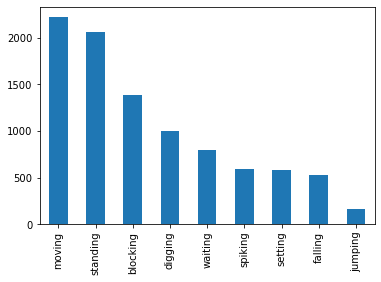

In [7]:
data_pd.motion.value_counts().plot(kind="bar")

In [23]:
data_pd.motion.value_counts()

moving      2219
standing    2054
blocking    1387
digging     1002
waiting      793
spiking      593
setting      578
falling      525
jumping      158
Name: motion, dtype: int64

In [24]:
train_data_pd, val_data_pd = train_test_split(data_pd,test_size=0.2, stratify=data_pd[['motion']])
train_data_pd = train_data_pd.reset_index(drop=True)
val_data_pd = val_data_pd.reset_index(drop=True)

In [25]:
def one_hot(data):
    one_hot = pd.get_dummies(data['motion'])
    data = data.drop('motion',axis = 1)
    data = data.join(one_hot)
    return data

In [26]:
oh_val_data_pd = one_hot(val_data_pd)
oh_train_data_pd = one_hot(train_data_pd)

In [27]:
oh_val_data_pd.to_csv(os.path.join(csv_save_directory, 'val_data.csv'))
oh_train_data_pd.to_csv(os.path.join(csv_save_directory, 'train_data.csv'))